<h1 style ="text-align:center"> CSC 3220-001 </h1>
<h2 style ="text-align:center"> Exploratory Data Analysis: Netflix Recommender System </h2>
<h3 style ="text-align:center"> 11/22/2022 </h3>
<h2 style ="text-align:center"> Recommender Systems Group</h2>
<h4 style ="text-align:center"> Antonio Brown </h4>
<h4 style ="text-align:center"> Cade Kennedy </h4>
<h4 style ="text-align:center"> Christine Ong </h4>
<h4 style ="text-align:center"> Daniel Harnden </h4>
<h4 style ="text-align:center"> Shelby Smith </h4>

---

# Summary

In this Exploratory Analysis we will find patterns and relationships to use for reference when creating our Netflix movie recomendation system.

# Data Sources

Below we import the tools we need to work with the data such as:
        
        - pandas - for data analysis and manipulation
        - numpy - for working with arrays
        - matplotlib.pyplot - for interactive plots and simple cases of programmatic plot generation
        - searborn - for data visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next we read the cvs data we will be using in this report:
        
        - netflix1.csv 
               - https://www.kaggle.com/datasets/infamouscoder/dataset-netflix-shows
        - Netflix_Dataset_Movie.csv and Netflix_Dataset_Rating.csv
               - https://www.kaggle.com/datasets/rishitjavia/netflix-movie-rating-dataset

In [2]:
df = pd.read_csv("netflix1.csv")
df2 = pd.read_csv("Netflix_Dataset_Movie.csv")
df3 = pd.read_csv("Netflix_Dataset_Rating.csv")

# Exploratory Analysis

### Checking for Null Values

In [3]:
df[df.isnull()].count()
df2[df2.isnull()].count()
df3[df3.isnull()].count()

User_ID     0
Rating      0
Movie_ID    0
dtype: int64

We determine that none of the dataframes have null values, and we have chosen to continues on to merging th dataframes in order to see the relationships between all of the data.

### Merging the Dataframes

To start we merge the df2 and df3 dataframes containing "Netflix_Dataset_Movie.csv" and "Netflix_Dataset_Rating.csv" respectivly.

In [4]:
df_ratings = df2.merge(df3)

Next we merge the df_ratings dataframe from above, with the df dataframe containing "netflix1.csv" data, but first we change the names of the df_ratings columns to the ones that match the netflix rating to allow them to merge successfully.

In [5]:
df_ratings = df_ratings.rename(columns={"Name": "title", "Rating": "user_rating"})
df = pd.merge(df, df_ratings)

### Manipulating Data

Next we change Type to a Nominal variable "is_movie" where 0 is not a movie and 1 is a movie.

In [6]:
df["is_movie"] = [1 if i == "Movie" else 0 for i in df["type"]]

Next we convert the first item in "listed_in" to a new column "genres", we keep the first one because we assume it is the most important.

In [7]:
list_genres = []

for i in range(len(df)):
    list_genres.append(df["listed_in"].iloc[i].split(", ")[0])
    
df["genres"] = pd.Series(list_genres)

Next we remove the minutes units from all movies and remove times from anything not labled as a movie.

In [8]:
duration = []

for i in range(len(df)):
    if df["is_movie"].iloc[i]==1:
        duration.append(int(df["duration"].iloc[i][:-4]))
    else:
        duration.append(1)
        
df["duration"] = pd.Series(duration)

### Frequency Distributions

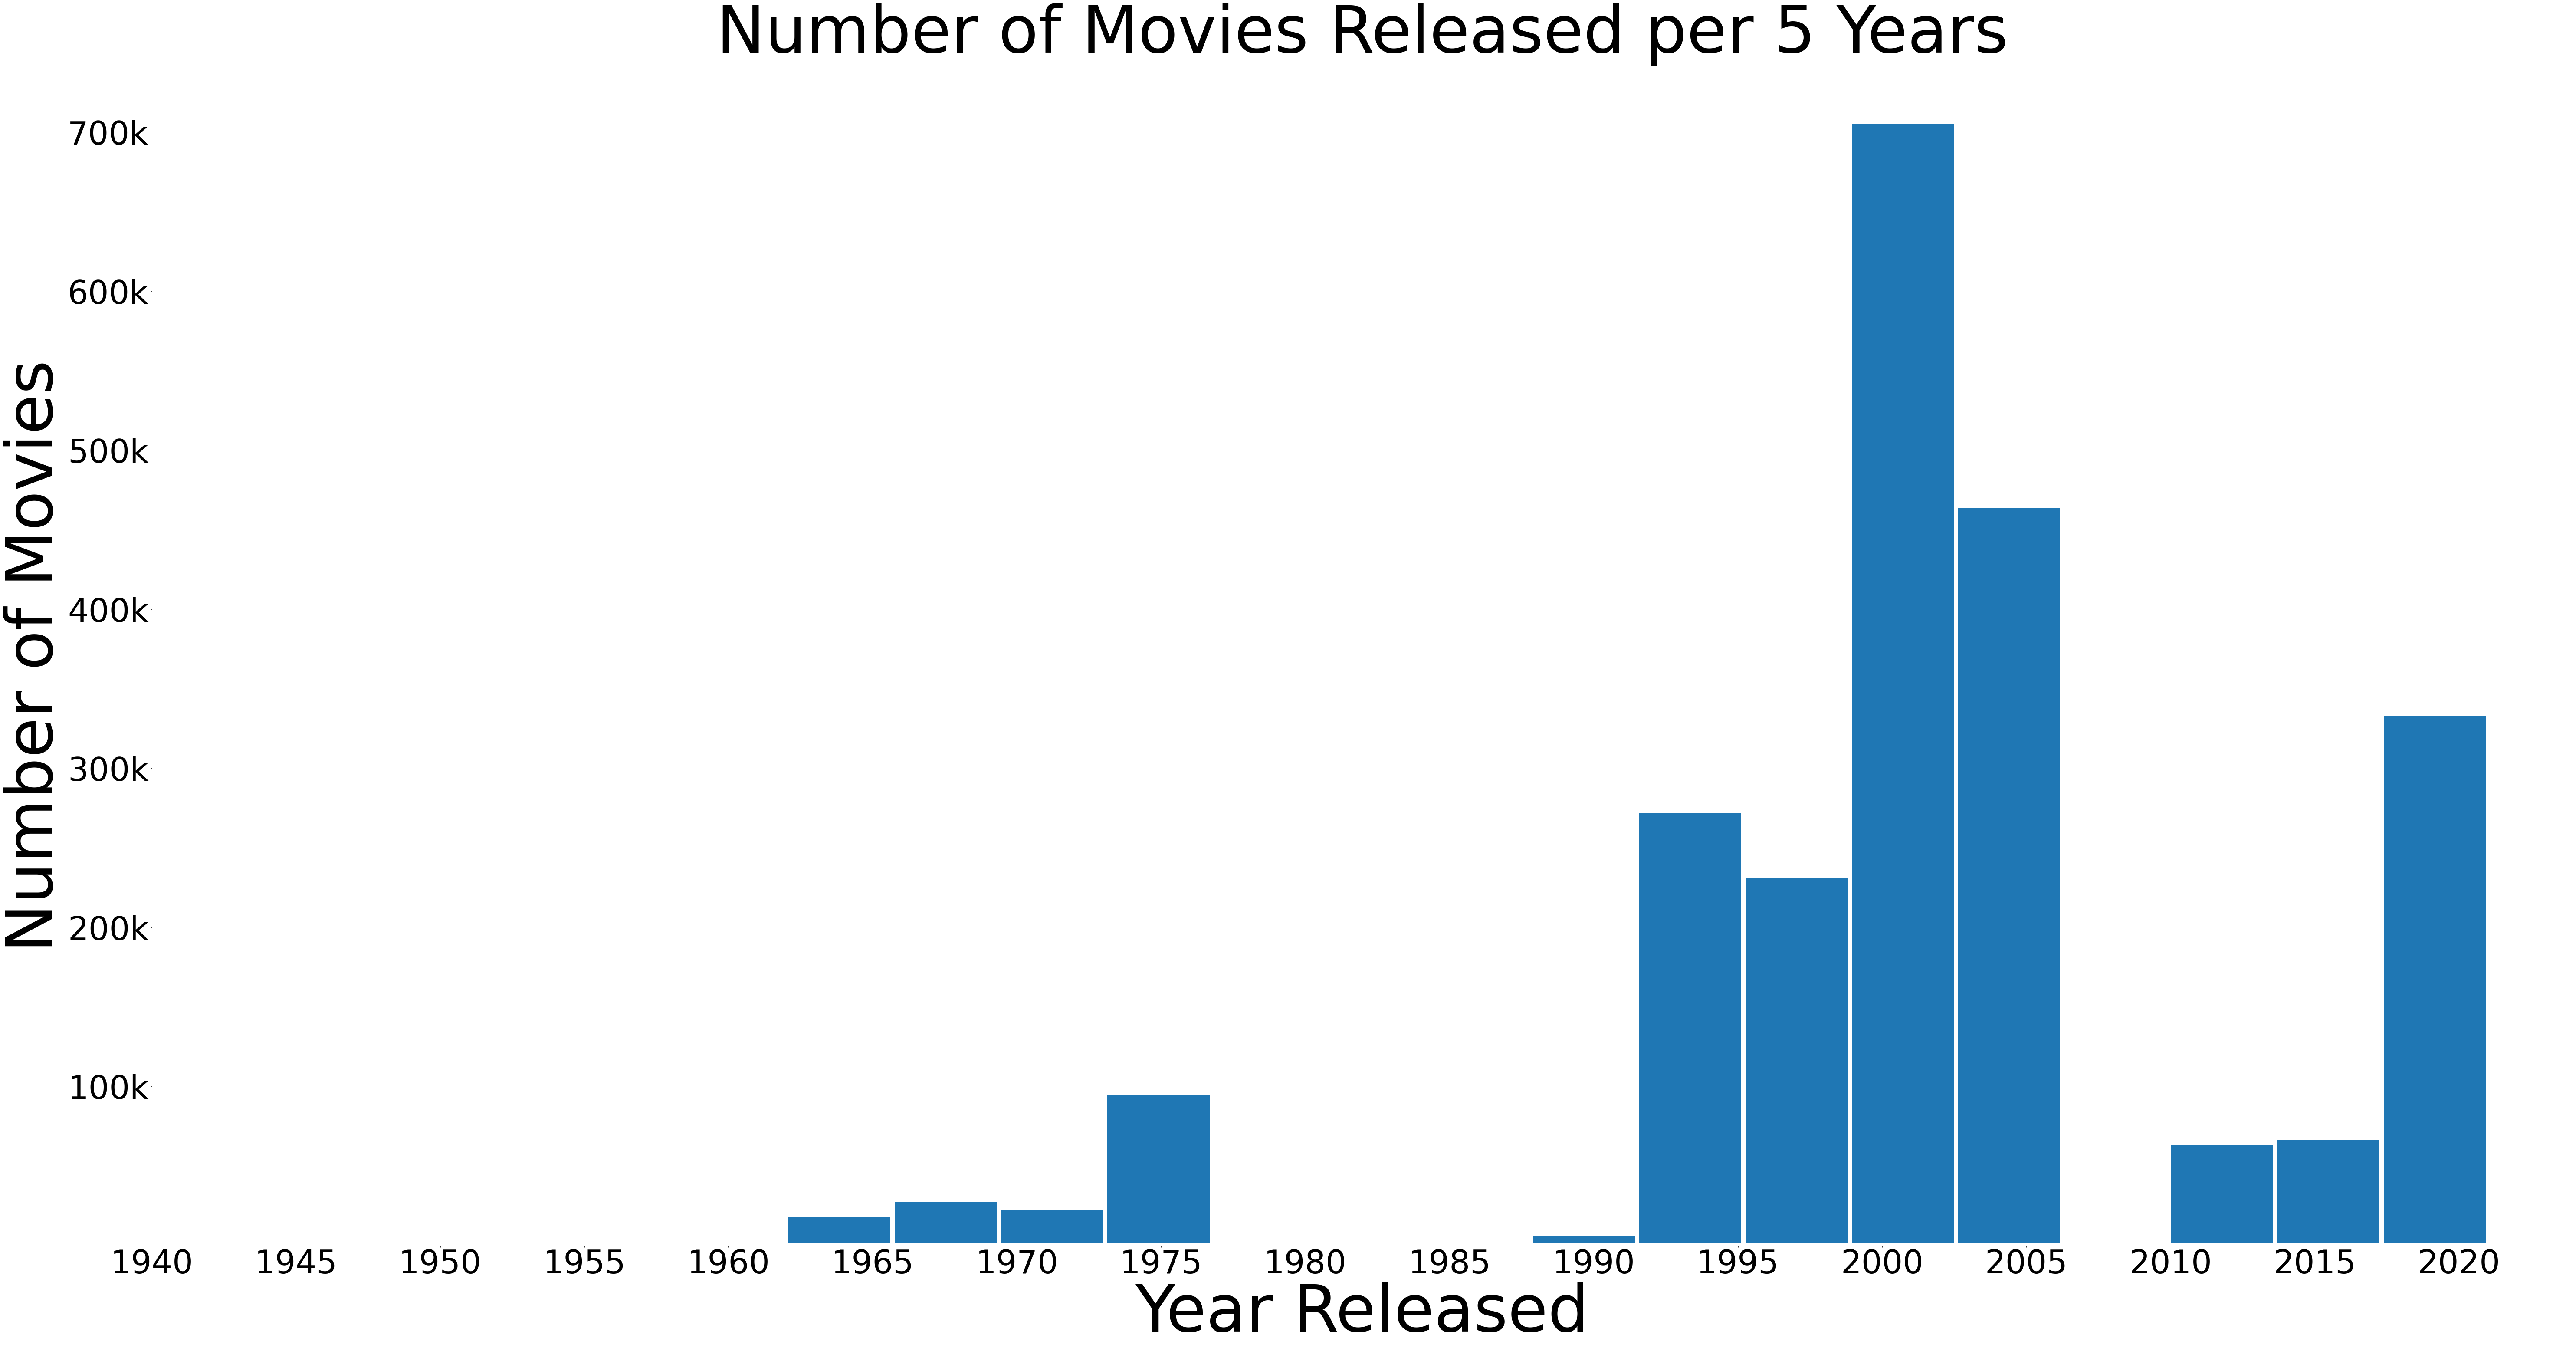

In [9]:
plt.figure(figsize=(100, 50))
plt.hist(df["release_year"], bins = 16, edgecolor='white', linewidth=10)
plt.title('Number of Movies Released per 5 Years', fontsize = 150)
plt.tick_params(axis = 'both', which = 'major', labelsize = 75)
plt.xticks([i for i in range(1940, 2021, 5)])
plt.yticks([100000, 200000, 300000, 400000, 500000, 600000, 700000], ["100k", "200k", "300k", "400k", "500k", "600k", "700k"])
plt.xlabel("Year Released", fontsize = 150)
plt.ylabel("Number of Movies", fontsize = 150, rotation = 90)
plt.show()

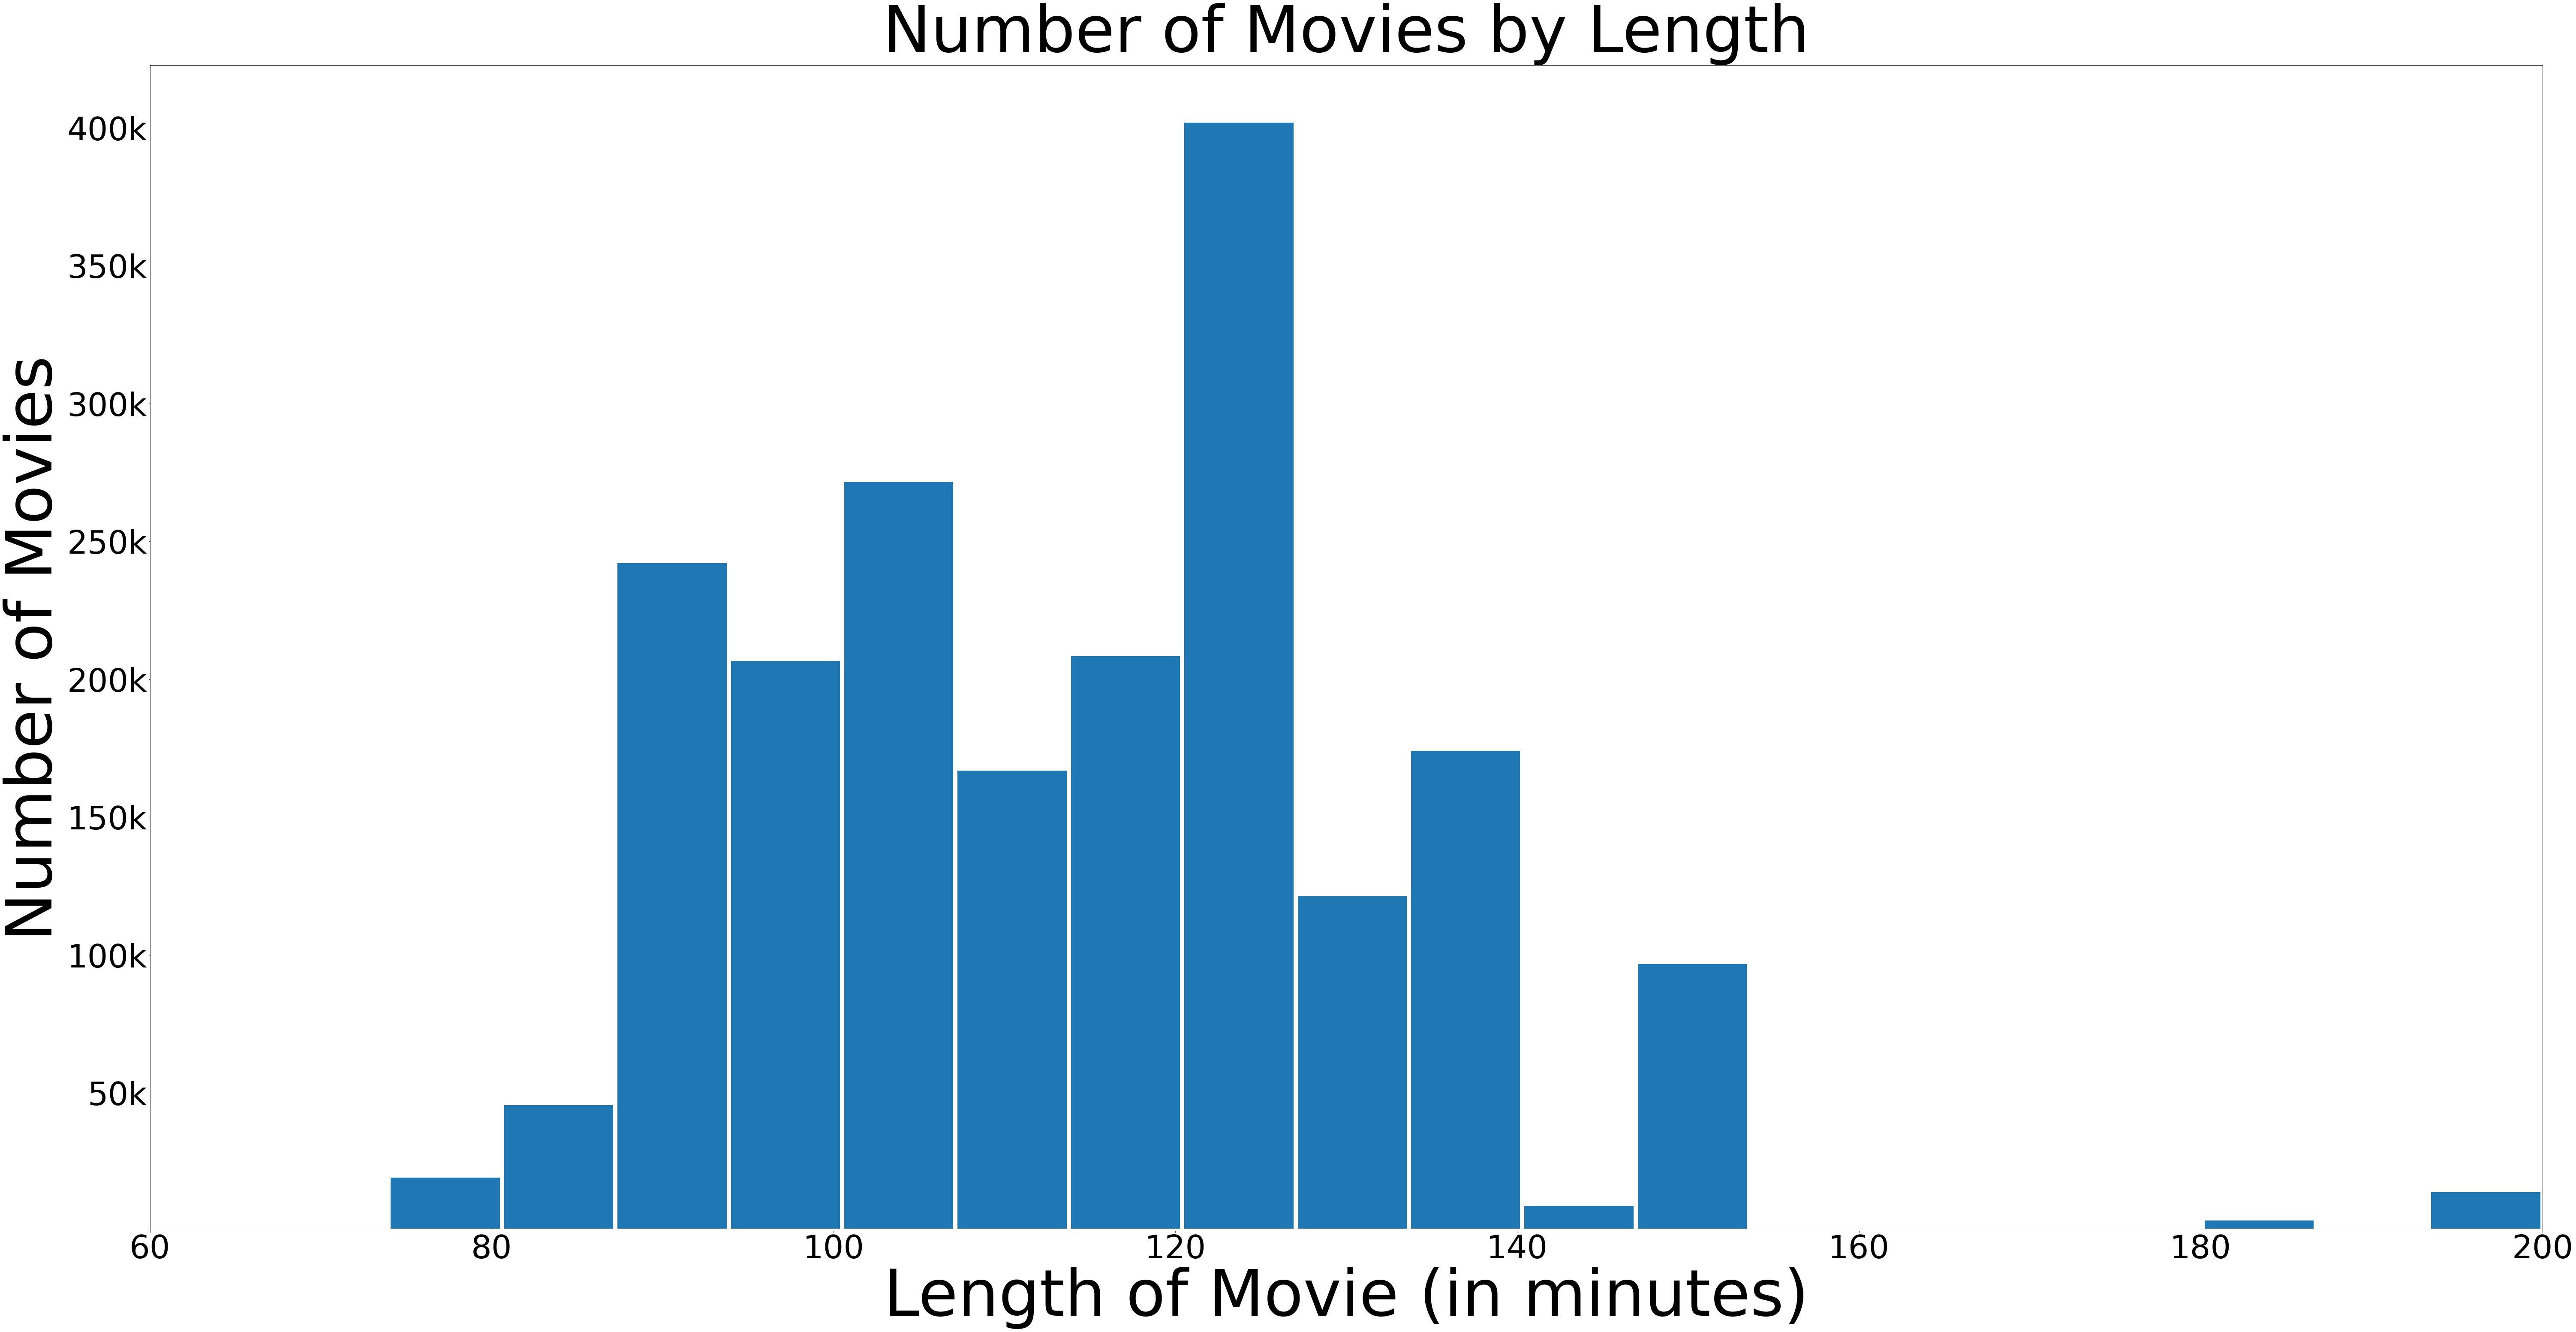

In [10]:
plt.figure(figsize=(100, 50))
plt.hist(df["duration"], bins = 30, edgecolor='white', linewidth=10)
plt.title('Number of Movies by Length', fontsize = 150)
plt.tick_params(axis = 'both', which = 'major', labelsize = 75)
plt.xticks([60, 80, 100, 120, 140, 160, 180, 200])
plt.yticks([50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000], ["50k", "100k", "150k", "200k", "250k", "300k", "350k", "400k"])
plt.xlabel("Length of Movie (in minutes)", fontsize = 150)
plt.ylabel("Number of Movies", fontsize = 150, rotation = 90)
plt.xlim(60, 200)
plt.show()

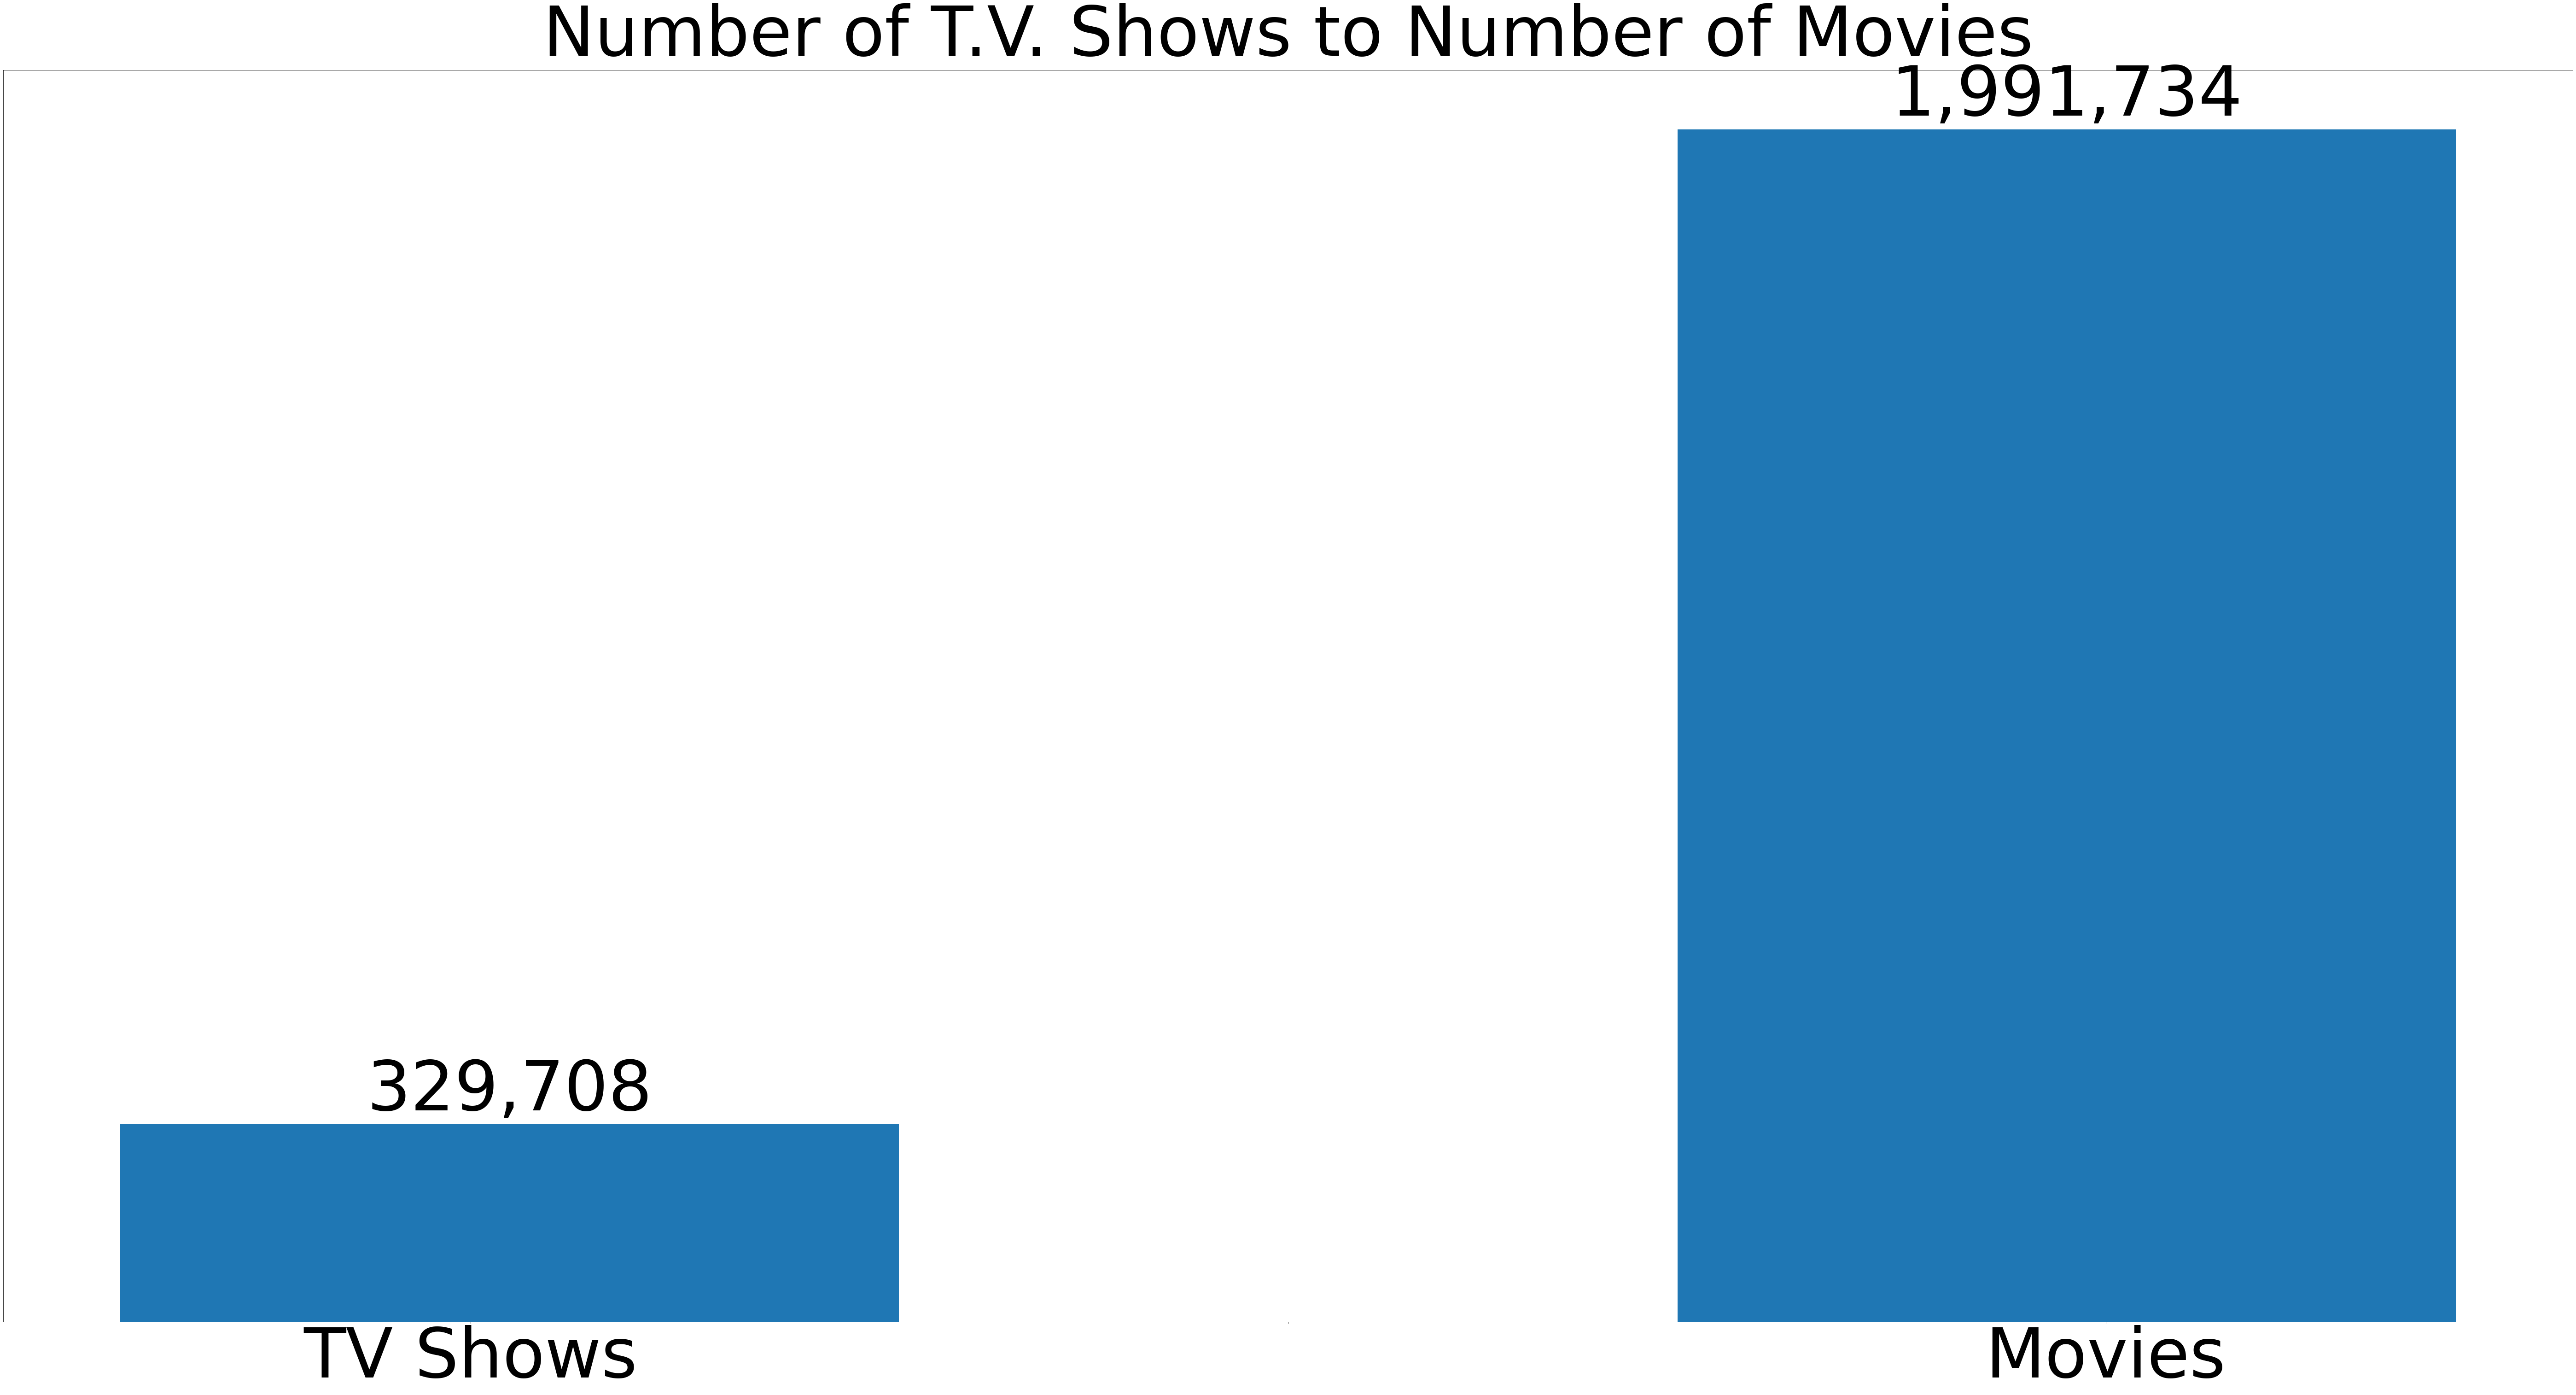

In [11]:
plt.figure(figsize=(100, 50))
values, bins, bars = plt.hist(df["is_movie"], bins=3)
plt.title('Number of T.V. Shows to Number of Movies', fontsize = 150)
plt.xticks([0.15, 0.5, 0.85], ["TV Shows", '', "Movies"], fontsize = 150)
plt.bar_label(bars, ["329,708", "", "1,991,734"], fontsize=150, color='black')
plt.tick_params(left = False, right = False , labelleft = False)
plt.show()

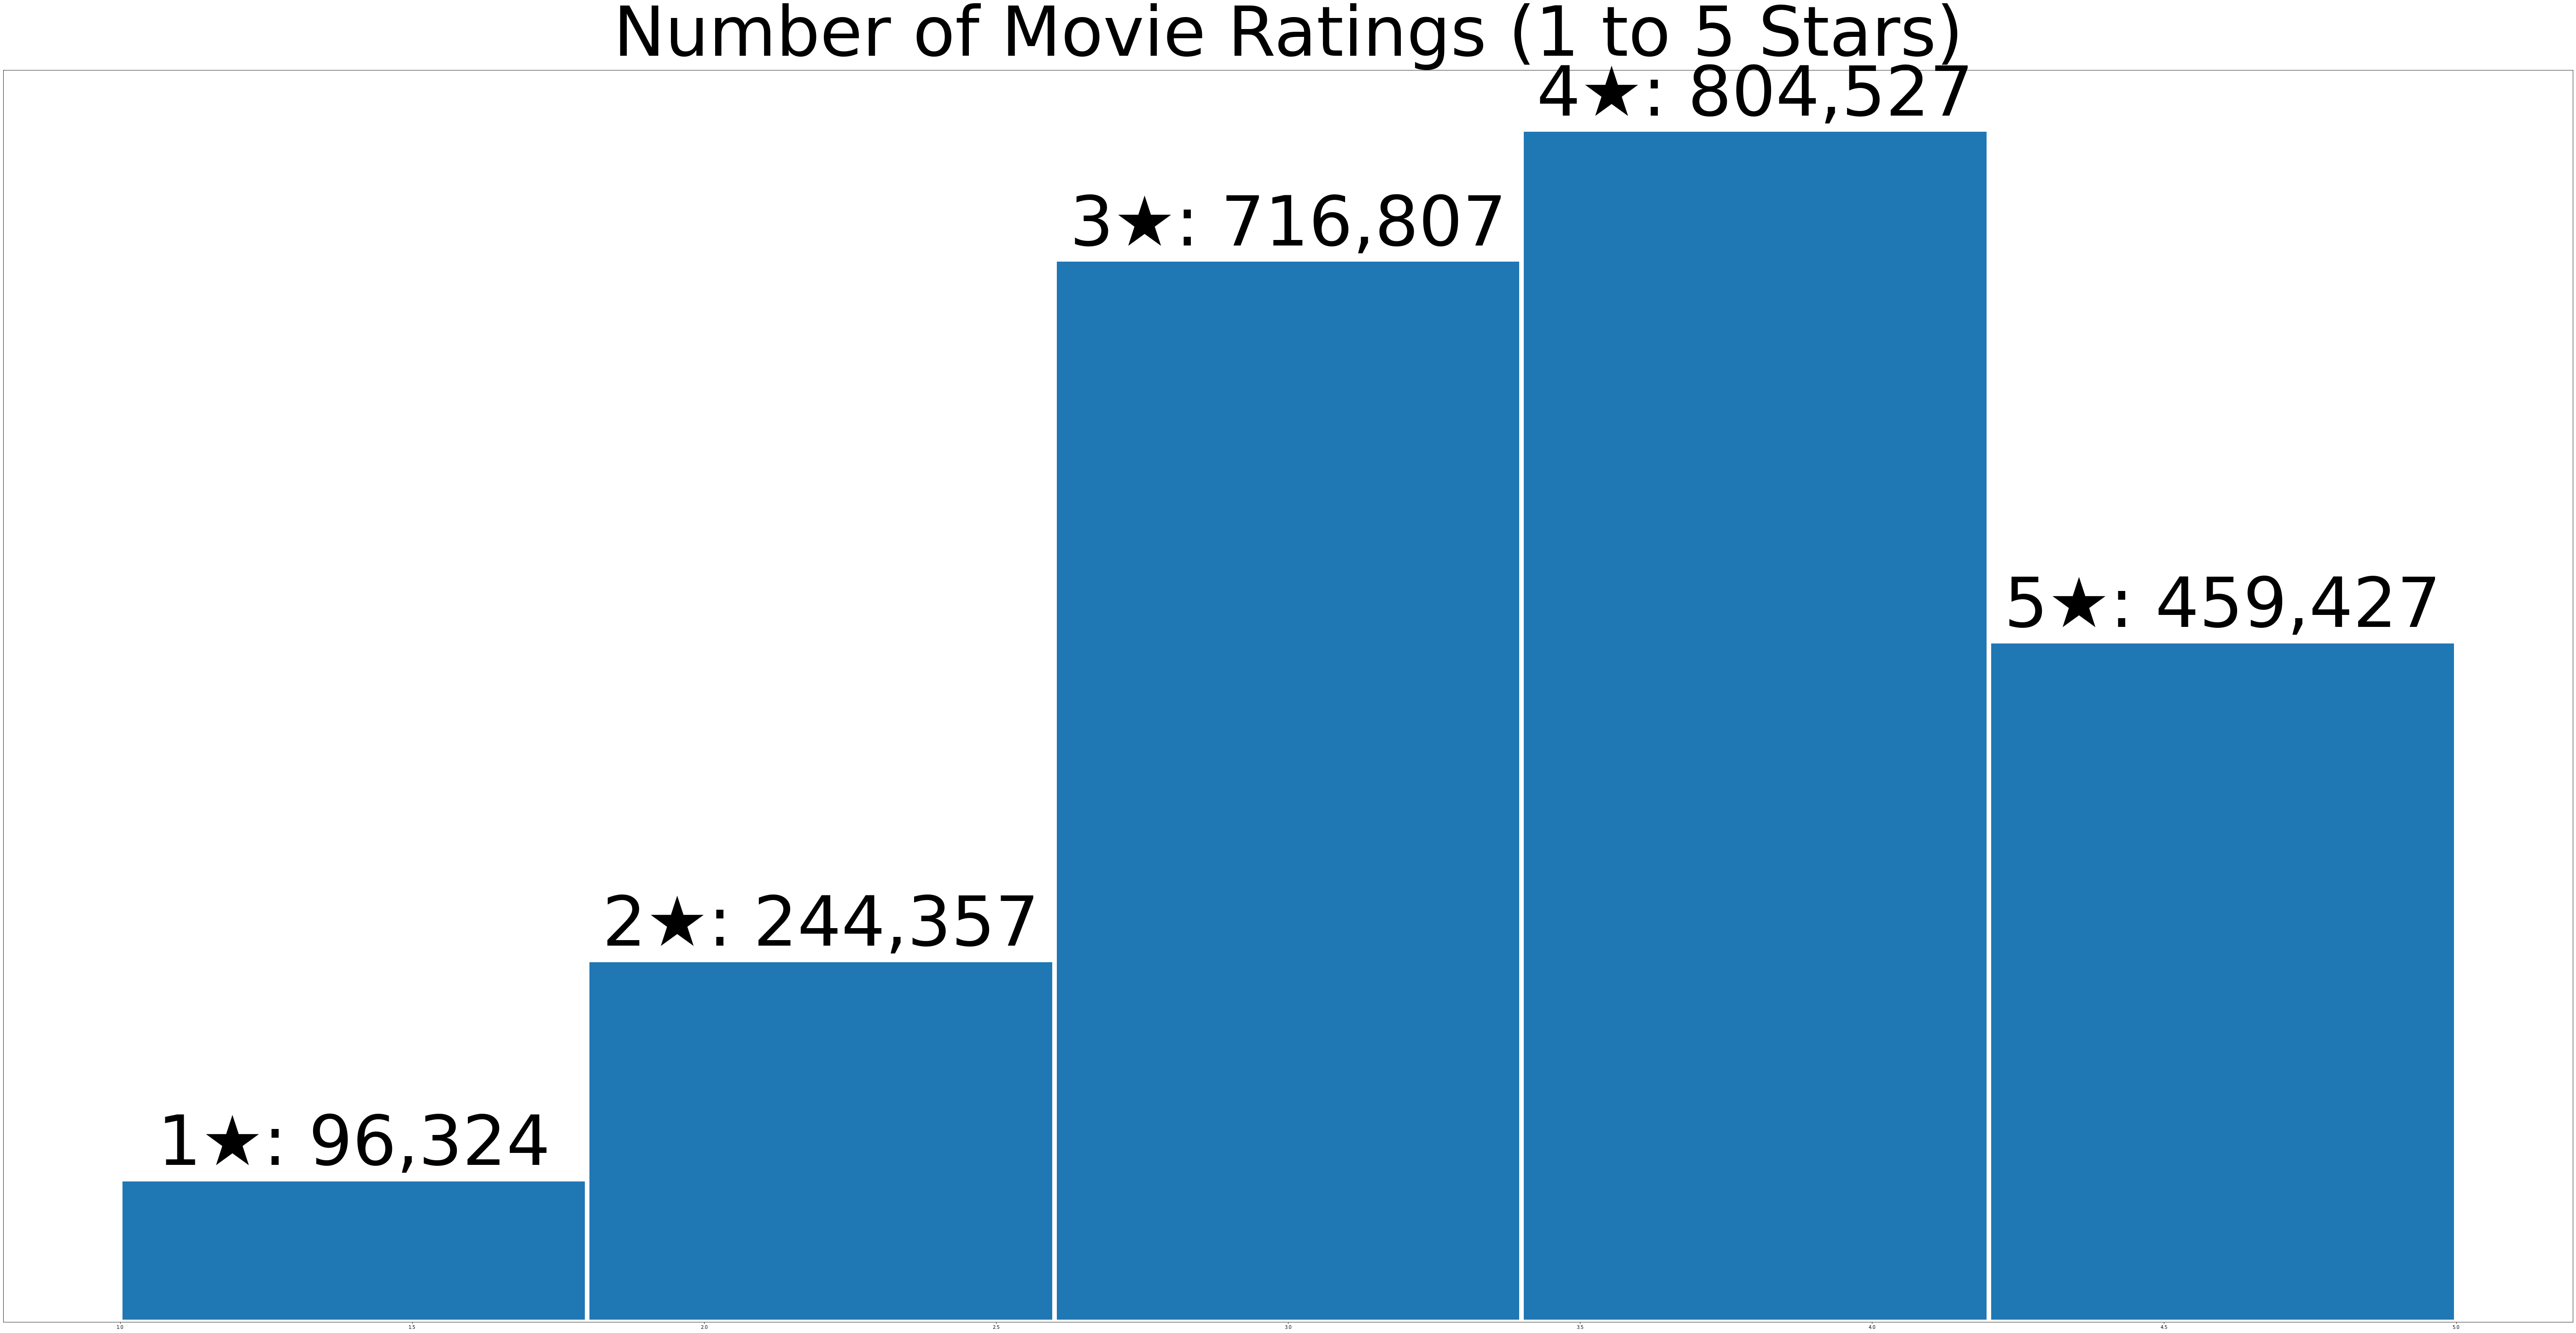

In [12]:
plt.figure(figsize=(100, 50))
values, bins, bars = plt.hist(df["user_rating"], bins = 5, edgecolor='white', linewidth=10)
plt.title('Number of Movie Ratings (1 to 5 Stars)', fontsize = 150)
plt.bar_label(bars, ["1★: 96,324", "2★: 244,357", "3★: 716,807", "4★: 804,527", "5★: 459,427"], fontsize=150, color='black')
plt.tick_params(left = False, right = False , labelleft = False)
plt.show()

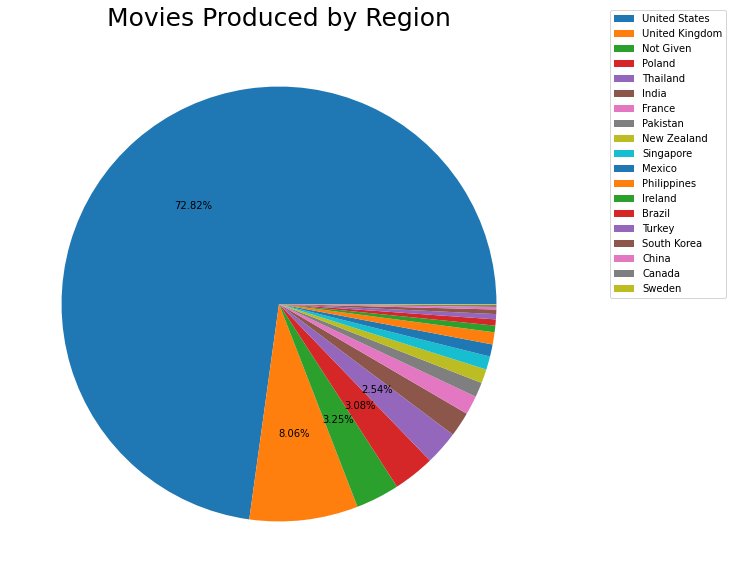

In [13]:
country_count = df.groupby("country").count().sort_values("title", ascending = False)
plt.figure(figsize=(10, 10))
plt.pie(country_count["title"].iloc[0:30], autopct = lambda v: f'{v:.2f}%' if v > 2.5 else None, colors = ['#a9a9a9', '#2f4f4f', '#556b2f', '#228b22', '#8b0000', '#808000', '#483d8b', '#bdb76b', '#008b8b', '#00008b', '#7f007f', '#b03060', '#66cdaa', '#ff4500', '#ffa500', '#ffff00', '#00ff00', '#9400d3', '#00ff7f', '#dc143c', '#00ffff', '#00bfff', '#f4a460', '#0000ff', '#adff2f', '#ff00ff', '#fa8072', '#6495ed', '#dda0dd', '#90ee90', '#ff1493', '#7b68ee', '#afeeee', '#ee82ee', '#ffe4c4', '#ffb6c1'].reverse())
ax = plt.subplot()
plt.title('Movies Produced by Region', fontsize = 25)
ax.legend(country_count['title'].iloc[0:30].index, bbox_to_anchor=(1.1, 1.05))
plt.show()

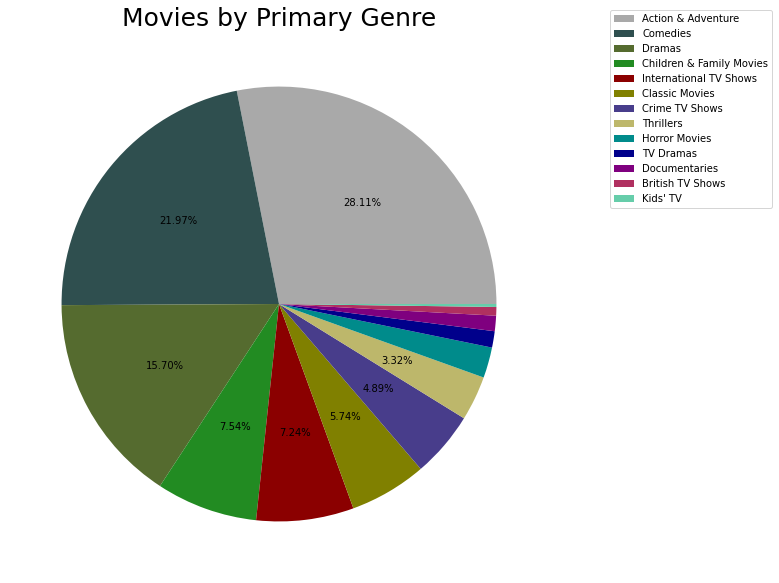

In [14]:
plt.figure(figsize=(10, 10))
plt.pie(df.groupby("genres").count().sort_values("title", ascending=False)["title"], autopct = lambda v: f'{v:.2f}%' if v > 2.5 else None, colors=['#a9a9a9', '#2f4f4f', '#556b2f', '#228b22', '#8b0000', '#808000', '#483d8b', '#bdb76b', '#008b8b', '#00008b', '#7f007f', '#b03060', '#66cdaa', '#ff4500', '#ffa500', '#ffff00', '#00ff00', '#9400d3', '#00ff7f', '#dc143c', '#00ffff', '#00bfff', '#f4a460', '#0000ff', '#adff2f', '#ff00ff', '#fa8072', '#6495ed', '#dda0dd', '#90ee90', '#ff1493', '#7b68ee', '#afeeee', '#ee82ee', '#ffe4c4', '#ffb6c1'])
ax = plt.subplot()
plt.title('Movies by Primary Genre', fontsize = 25)
ax.legend(df.groupby("genres").count().sort_values("title", ascending=False).index, bbox_to_anchor=(1.1, 1.05))
plt.show()

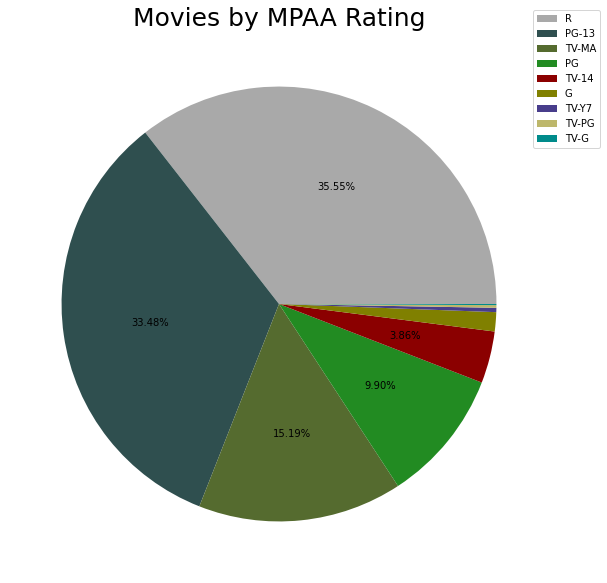

In [15]:
plt.figure(figsize=(10,10))
plt.pie(df.groupby("rating").count().sort_values("title", ascending=False)["title"], autopct = lambda v: f'{v:.2f}%' if v > 2.5 else None, colors=['#a9a9a9', '#2f4f4f', '#556b2f', '#228b22', '#8b0000', '#808000', '#483d8b', '#bdb76b', '#008b8b', '#00008b', '#7f007f', '#b03060', '#66cdaa', '#ff4500', '#ffa500', '#ffff00', '#00ff00', '#9400d3', '#00ff7f', '#dc143c', '#00ffff', '#00bfff', '#f4a460', '#0000ff', '#adff2f', '#ff00ff', '#fa8072', '#6495ed', '#dda0dd', '#90ee90', '#ff1493', '#7b68ee', '#afeeee', '#ee82ee', '#ffe4c4', '#ffb6c1'])
ax = plt.subplot()
plt.title('Movies by MPAA Rating', fontsize = 25)
ax.legend(df.groupby("rating").count().sort_values("title", ascending=False).index, bbox_to_anchor=(1.1, 1.05))
plt.show()

### Correlation Heatmap

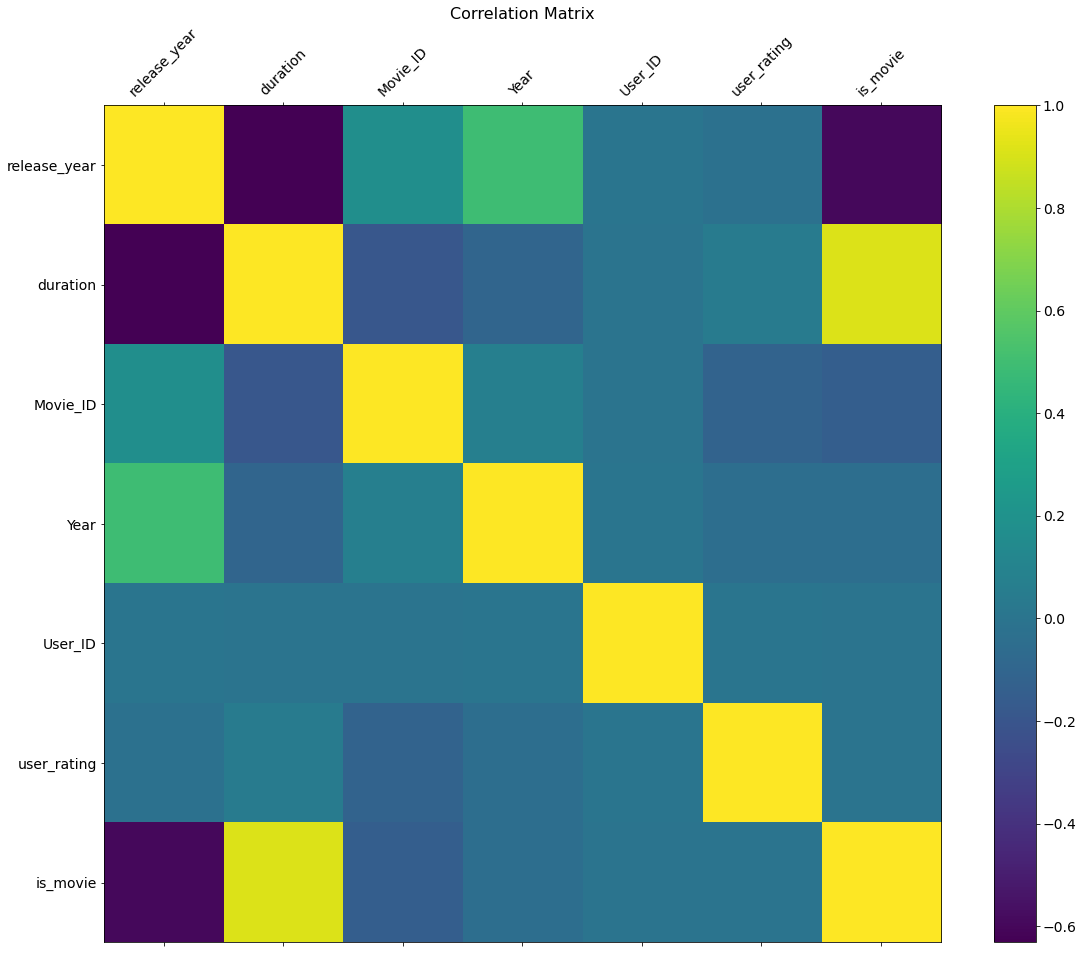

In [16]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum = f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize = 14, rotation = 45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize = 14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.title('Correlation Matrix', fontsize = 16);

There are very few correlations between the data present in the correlation matrix, besides the obvious correlations (release_year and Year are duplicate variables, is_movie and duration correlate because only movies have a duration, Movie_ID and release_year correlate because Movie_ID increases linearly as movies release). Relationships between other variables are negligible, both positively and negatively.

### Simplifying Data

In [17]:
# First we drop "show_id" and "Movie_ID" from the dataframe because the information is irrelevant
# We also drop "Year" due to the data being a duplicate of "release_year"
df.drop(["show_id", "Movie_ID", "Year"], axis = 1, inplace = True)

# Next we drop "date_added" because we assume that it does not correlate with "user_rating"
df.drop(["date_added"], axis = 1, inplace = True)

# Next we drop "type" because the information is a duplicate of "is_movie"
df.drop("type", axis = 1, inplace = True)

# Finally we remove all rows where "is_movie" is equal to 0, leaving only movies in the dataframe
# We also drop the column "is_movie" due to it only being true and therefore redundant
df = df[df["is_movie"] == 1]
df.drop(["is_movie"], axis = 1, inplace = True)

## Conclusion

The data available in the datasets used for this exploratory analysis provides us with various data points that can be used in developing a recommender system. Since the data skews heavily towards movies, T.V. shows were not going to be properly recommended, so were subsequently dropped from the data frame. The most important data gathered are the "genre," "rating," "region," and "year" which can be used to recommend highly rated movies of similar genres and from similar regions or years. No unexpected patterns or relationships were found in this exploratory analysis, and neither were any anomalies or outliers.

## Building the machine learning model for our recommendation system

In [19]:
df_user = df.sort_values("User_ID")

df_user.head()

,title,director,country,release_year,rating,duration,listed_in,User_ID,user_rating,genres
1789405,S.W.A.T.,Clark Johnson,United States,2003,PG-13,117,Action & Adventure,6,1,Action & Adventure
482780,Stargate,Roland Emmerich,United States,1994,PG-13,121,"Action & Adventure, Sci-Fi & Fantasy",6,2,Action & Adventure
877418,About a Boy,"Chris Weitz, Paul Weitz",United Kingdom,2002,PG-13,101,"Comedies, Dramas, International Movies",6,3,Comedies
2022279,The Amityville Horror,Andrew Douglas,United States,2005,R,89,Horror Movies,6,3,Horror Movies
1729155,Rosemary's Baby,Roman Polanski,United States,1968,R,137,"Classic Movies, Horror Movies, Thrillers",6,3,Classic Movies


In [20]:
allUserIds = df_user["User_ID"].unique()
allUserIds

array([      6,       7,      79, ..., 2649388, 2649426, 2649429])

In [21]:
num_ratings_per_user = df_user.groupby("User_ID").count()

num_ratings_per_user

,title,director,country,release_year,rating,duration,listed_in,user_rating,genres
User_ID,,,,,,,,,
6,18,18,18,18,18,18,18,18,18
7,25,25,25,25,25,25,25,25,25
79,24,24,24,24,24,24,24,24,24
97,14,14,14,14,14,14,14,14,14
134,27,27,27,27,27,27,27,27,27
...,...,...,...,...,...,...,...,...,...
2649370,8,8,8,8,8,8,8,8,8
2649378,8,8,8,8,8,8,8,8,8
2649388,9,9,9,9,9,9,9,9,9


In [23]:
max_user = num_ratings_per_user[num_ratings_per_user["title"]==df_user.groupby("User_ID").count().max().title]
max_user

,title,director,country,release_year,rating,duration,listed_in,user_rating,genres
User_ID,,,,,,,,,
387418,81,81,81,81,81,81,81,81,81


In [24]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


def classification_model(user_to_rate, model):
    cat_features = df_user.drop(["user_rating", "duration", "User_ID", "release_year", "title"], axis=1).columns
    x_list = ["duration", "release_year"]
    for i in cat_features:
        df_user[f"{i}"] = df_user[f"{i}"].astype('category')
        df_user[f"{i}"] = df_user[f"{i}"].cat.codes
        x_list.append(i)
    df_user_id = df_user[df_user["User_ID"]==user_to_rate]
    x = df_user_id[x_list]
    y = np.array(df_user_id["user_rating"]).reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    real = np.array([i[0] for i in y_test.tolist()])
#     print("Predicted Ratings:")
#     print(prediction)
#     print("Actual Ratings: ")
#     print(real)
    return abs(mean_squared_error(np.array(prediction).reshape(-1, 1), np.array(y_test).reshape(-1, 1)))


In [25]:
print(len(allUserIds))

143331


2.0625183150183144


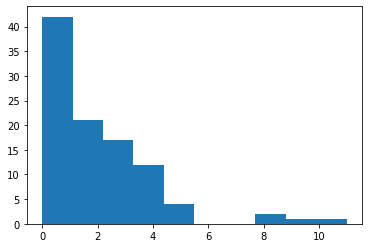

In [26]:
multinomial = []
for i in allUserIds[0:100]:
    try:
        multinomial.append(classification_model(i, MultinomialNB()))
    except:
        pass
print(sum(multinomial)/100)
multinomial.sort()
plt.hist(multinomial)
plt.show()

1.413573260073261


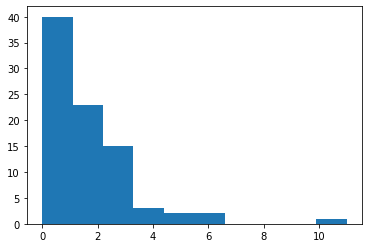

In [27]:
knn_scores = []
for i in allUserIds[0:100]:
    try:
        knn_scores.append(classification_model(i, KNeighborsClassifier(metric="cosine")))
    except:
        pass
print(sum(knn_scores)/100)
knn_scores.sort()
plt.hist(knn_scores)
plt.show()

2.2379743589743595


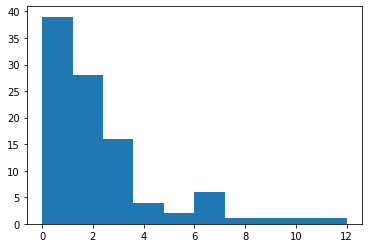

In [28]:
gaussian_process_scores = []
for i in allUserIds[0:100]:
    try:
        gaussian_process_scores.append(classification_model(i, GaussianProcessClassifier()))
    except:
        pass
print(sum(gaussian_process_scores)/100)
gaussian_process_scores.sort()
plt.hist(gaussian_process_scores)
plt.show()

1.917364468864469


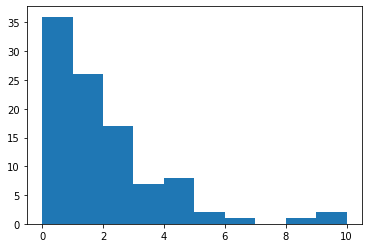

In [29]:
dtc_scores = []
for i in allUserIds[0:100]:
    try:
        dtc_scores.append(classification_model(i, DecisionTreeClassifier()))
    except:
        pass
print(sum(dtc_scores)/100)
dtc_scores.sort()
plt.hist(dtc_scores)
plt.show()

1.8752161172161175


[]

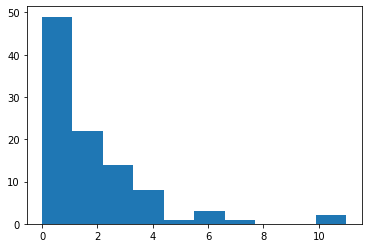

In [30]:
mlp_scores = []
for i in allUserIds[0:100]:
    try:
        mlp_scores.append(classification_model(i, MLPClassifier()))
    except:
        pass
print(sum(mlp_scores)/100)
mlp_scores.sort()
plt.hist(mlp_scores)
plt.plot()

1.894012820512821


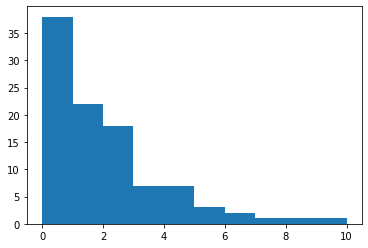

In [31]:
random_forest_scores = []
for i in allUserIds[0:100]:
    try:
        random_forest_scores.append(classification_model(i, RandomForestClassifier()))
    except:
        pass
print(sum(random_forest_scores)/100)
random_forest_scores.sort()
plt.hist(random_forest_scores)
plt.show()

1.6312985347985351


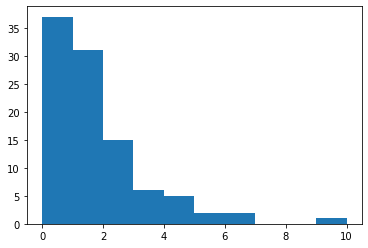

In [32]:
svc_scores = []
for i in allUserIds[0:100]:
    try:
        svc_scores.append(classification_model(i, SVC()))
    except:
        pass
print(sum(svc_scores)/100)
svc_scores.sort()
plt.hist(svc_scores)
plt.show()

1.5777179487179487


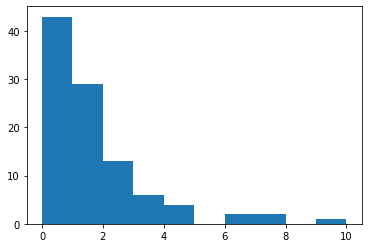

In [33]:
naive_bayes_scores = []
for i in allUserIds[0:100]:
    try:
        naive_bayes_scores.append(classification_model(i, GaussianNB()))
    except:
        pass
print(sum(naive_bayes_scores)/100)
naive_bayes_scores.sort()
plt.hist(naive_bayes_scores)
plt.show()

## Demonstration of our recommendation system

In [90]:
demonstrated_user = allUserIds[-55]
df_demonstration = df_user[df_user["User_ID"]==demonstrated_user]
df_demonstration[df_demonstration.user_rating==max(df_demonstration.user_rating)]

,title,director,country,release_year,rating,duration,listed_in,User_ID,user_rating,genres
86107,Training Day,7,11,2001,3,122,39,2648609,4,5
996614,American Psycho,38,11,2000,3,102,21,2648609,4,3
2106878,Trainspotting,16,10,1996,3,94,21,2648609,4,3
708934,Lock,68,4,2016,4,90,37,2648609,4,5
918263,American Beauty,66,11,1999,3,122,33,2648609,4,5
691018,Back to School,64,8,2019,5,84,26,2648609,4,3
282127,The Game,17,11,1997,3,129,43,2648609,4,7


In [91]:
df_demonstration

,title,director,country,release_year,rating,duration,listed_in,User_ID,user_rating,genres
86107,Training Day,7,11,2001,3,122,39,2648609,4,5
1389964,Fear and Loathing in Las Vegas,71,11,1998,3,118,21,2648609,3,3
996614,American Psycho,38,11,2000,3,102,21,2648609,4,3
1636573,Men in Black II,9,11,2002,2,88,4,2648609,2,0
2106878,Trainspotting,16,10,1996,3,94,21,2648609,4,3
199759,Mystery Men,34,11,1999,2,121,3,2648609,2,0
1170217,Chasing Amy,33,11,1997,3,113,21,2648609,3,3
216812,The Piano,28,7,1993,3,121,16,2648609,1,2
1714616,Rosemary's Baby,62,11,1968,3,137,19,2648609,3,2
708934,Lock,68,4,2016,4,90,37,2648609,4,5


In [92]:
len(df_demonstration)

16

In [93]:
movies_dataset = df_user[["title", 'duration', 'director', 'country', 'release_year', 'rating' ,'listed_in', 'genres']].drop_duplicates(subset=['title'])


In [94]:
from sklearn import preprocessing

model = KNeighborsClassifier(metric="cosine")
X = preprocessing.StandardScaler().fit_transform(np.array(df_demonstration[["duration", "release_year"]]))
y = np.array(df_demonstration["user_rating"]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train, y_train)
mse = abs(mean_squared_error(np.array(model.predict(X_test)).reshape(-1, 1), np.array(y_test).reshape(-1, 1)))

mse

0.5

In [95]:
predictions = model.predict(preprocessing.StandardScaler().fit_transform(movies_dataset[["duration", "release_year"]]))
print(predictions)

[3 4 4 4 4 3 4 4 4 4 4 3 3 4 4 3 4 4 4 3 3 4 4 4 4 3 4 4 3 4 4 4 3 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 3 3 4 4
 4 4 3 4 4 4]


In [96]:
dictionary_title_rating = {}
for i in range(len(movies_dataset.title)):
    dictionary_title_rating[movies_dataset.iloc[i].title] = predictions[i]
    

In [97]:
sorted_dict = dict(sorted(dictionary_title_rating.items(), key=lambda item: item[1]))
sorted_dict

{'S.W.A.T.': 3,
 "Something's Gotta Give": 3,
 'The American President': 3,
 'The Sum of All Fears': 3,
 'Kill Bill: Vol. 2': 3,
 'Training Day': 3,
 'Free Willy': 3,
 'Jaws': 3,
 'The Longest Yard': 3,
 'Coach Carter': 3,
 "Logan's Run": 3,
 'Psycho': 3,
 'Nothing to Lose': 3,
 'Highway': 3,
 'Stargate': 4,
 'About a Boy': 4,
 'The Amityville Horror': 4,
 "Rosemary's Baby": 4,
 'Men in Black II': 4,
 '50 First Dates': 4,
 'Four Weddings and a Funeral': 4,
 'The Flintstones': 4,
 'Clash of the Titans': 4,
 'Under Siege': 4,
 'Doctor Zhivago': 4,
 'Bad Boys II': 4,
 'Spy Kids': 4,
 'Jimmy Neutron: Boy Genius': 4,
 'The Talented Mr. Ripley': 4,
 'Bad Boys': 4,
 'American Beauty': 4,
 "Charlotte's Web": 4,
 'The Pianist': 4,
 'Ordinary People': 4,
 'Back to School': 4,
 'Fallen': 4,
 "Dr. Seuss' The Cat in the Hat": 4,
 'Domestic Disturbance': 4,
 'Exit Wounds': 4,
 'Spy Kids 2: The Island of Lost Dreams': 4,
 'Chasing Amy': 4,
 'Superstar': 4,
 'A Cinderella Story': 4,
 'Like Water for C

In [98]:
top_results = {print(i) for i in sorted_dict if sorted_dict[i]==max(sorted_dict.values())}


Stargate
About a Boy
The Amityville Horror
Rosemary's Baby
Men in Black II
50 First Dates
Four Weddings and a Funeral
The Flintstones
Clash of the Titans
Under Siege
Doctor Zhivago
Bad Boys II
Spy Kids
Jimmy Neutron: Boy Genius
The Talented Mr. Ripley
Bad Boys
American Beauty
Charlotte's Web
The Pianist
Ordinary People
Back to School
Fallen
Dr. Seuss' The Cat in the Hat
Domestic Disturbance
Exit Wounds
Spy Kids 2: The Island of Lost Dreams
Chasing Amy
Superstar
A Cinderella Story
Like Water for Chocolate
Evelyn
Evolution
Disclosure
The Game
Dragonheart
Congo
Lock
Mars Attacks!
Rocky V
Not Another Teen Movie
Center Stage
Croupier
American Psycho
BASEketball
Mutiny on the Bounty
Little Nicky
Mystery Men
Fear and Loathing in Las Vegas
Mansfield Park
Stuart Little 2
Dante's Peak
Scream 3
Ravenous
The Mirror Has Two Faces
The Flintstones in Viva Rock Vegas
Beverly Hills Ninja
The Piano
Trainspotting
My Girl 2
Animal Crackers
In Too Deep
King's Ransom
Kurt & Courtney
Cousins
Tremors 4: The L

In [99]:
from sklearn import preprocessing

model = DecisionTreeClassifier()
X = preprocessing.StandardScaler().fit_transform(np.array(df_demonstration[["duration", "release_year"]]))
y = np.array(df_demonstration["user_rating"]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train, y_train)
mse = abs(mean_squared_error(np.array(model.predict(X_test)).reshape(-1, 1), np.array(y_test).reshape(-1, 1)))

mse

2.25

In [100]:
predictions = model.predict(preprocessing.StandardScaler().fit_transform(movies_dataset[["duration", "release_year"]]))
print(predictions)

[3 1 4 4 3 3 4 4 1 4 3 3 3 4 3 3 3 4 4 3 3 3 1 3 4 3 3 3 1 4 3 4 3 4 4 4 3
 4 4 3 4 4 3 3 3 3 4 3 3 4 3 4 4 3 3 4 2 2 3 4 3 3 3 3 4 1 4 1 4 4 3 3 3 4
 4 4 3 4 4 3]


In [101]:
movies_dataset

,title,duration,director,country,release_year,rating,listed_in,genres
1789405,S.W.A.T.,117,15,11,2003,2,0,0
482780,Stargate,121,61,11,1994,2,6,0
877418,About a Boy,101,14,10,2002,2,23,3
2022279,The Amityville Horror,89,4,11,2005,3,40,6
1729155,Rosemary's Baby,137,62,11,1968,3,19,2
...,...,...,...,...,...,...,...,...
1542587,Kurt & Courtney,95,47,10,1998,3,32,4
730990,Highway,127,26,4,2014,4,5,0
241417,Cousins,99,0,7,2021,5,33,5
2121962,Tremors 4: The Legend Begins,101,65,11,2004,2,25,3


In [102]:
dictionary_title_rating = {}
for i in range(len(movies_dataset.title)):
    dictionary_title_rating[movies_dataset.iloc[i].title] = predictions[i]
    

In [103]:
sorted_dict = dict(sorted(dictionary_title_rating.items(), key=lambda item: item[1]))
sorted_dict

{'Stargate': 1,
 'Four Weddings and a Funeral': 1,
 'Bad Boys': 1,
 'The Longest Yard': 1,
 "Logan's Run": 1,
 'The Piano': 1,
 'Mystery Men': 2,
 'Fear and Loathing in Las Vegas': 2,
 'S.W.A.T.': 3,
 "Rosemary's Baby": 3,
 "Something's Gotta Give": 3,
 'Clash of the Titans': 3,
 'The American President': 3,
 'The Sum of All Fears': 3,
 'Doctor Zhivago': 3,
 'Kill Bill: Vol. 2': 3,
 'Bad Boys II': 3,
 'Training Day': 3,
 'Free Willy': 3,
 'The Talented Mr. Ripley': 3,
 'American Beauty': 3,
 'Jaws': 3,
 'The Pianist': 3,
 'Ordinary People': 3,
 'Fallen': 3,
 'Coach Carter': 3,
 'Chasing Amy': 3,
 'Like Water for Chocolate': 3,
 'Disclosure': 3,
 'The Game': 3,
 'Dragonheart': 3,
 'Congo': 3,
 'Mars Attacks!': 3,
 'Rocky V': 3,
 'Center Stage': 3,
 'BASEketball': 3,
 'Mutiny on the Bounty': 3,
 'Mansfield Park': 3,
 "Dante's Peak": 3,
 'Scream 3': 3,
 'Ravenous': 3,
 'The Mirror Has Two Faces': 3,
 'Psycho': 3,
 'Nothing to Lose': 3,
 'Animal Crackers': 3,
 'Highway': 3,
 'Biggie & Tupa

In [104]:
top_results = {print(i) for i in sorted_dict if sorted_dict[i]==max(sorted_dict.values())}


About a Boy
The Amityville Horror
Men in Black II
50 First Dates
The Flintstones
Under Siege
Spy Kids
Jimmy Neutron: Boy Genius
Charlotte's Web
Back to School
Dr. Seuss' The Cat in the Hat
Domestic Disturbance
Exit Wounds
Spy Kids 2: The Island of Lost Dreams
Superstar
A Cinderella Story
Evelyn
Evolution
Lock
Not Another Teen Movie
Croupier
American Psycho
Little Nicky
Stuart Little 2
The Flintstones in Viva Rock Vegas
Beverly Hills Ninja
Trainspotting
My Girl 2
In Too Deep
King's Ransom
Kurt & Courtney
Cousins
Tremors 4: The Legend Begins
